In [59]:
#libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [60]:
# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

In [61]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [62]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [63]:
mcdonalds.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [64]:
# Exploring the data
print(mcdonalds.columns)
print(mcdonalds.shape)
print(mcdonalds.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [65]:
# Data Preprocessing
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
print(np.round(MD_x.mean(), 2))


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [66]:
# Principal Component Analysis (PCA)
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


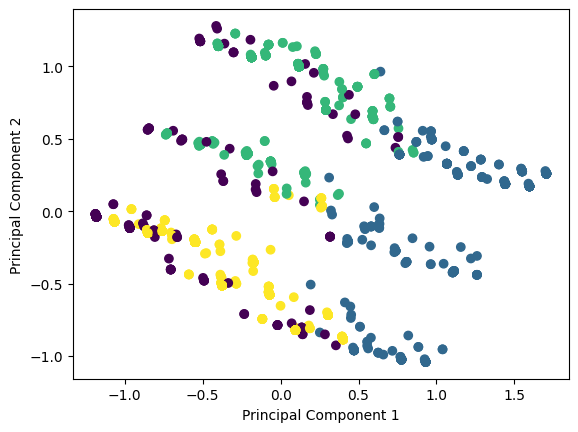

In [67]:
# Visualization
plt.scatter(MD_pca[:, 0], MD_pca[:, 1],c=MD_clusters, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

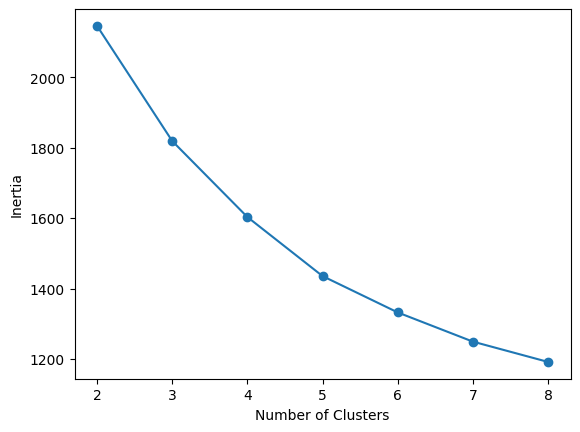

In [68]:
# K-Means Clustering
k_range = range(2, 9)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

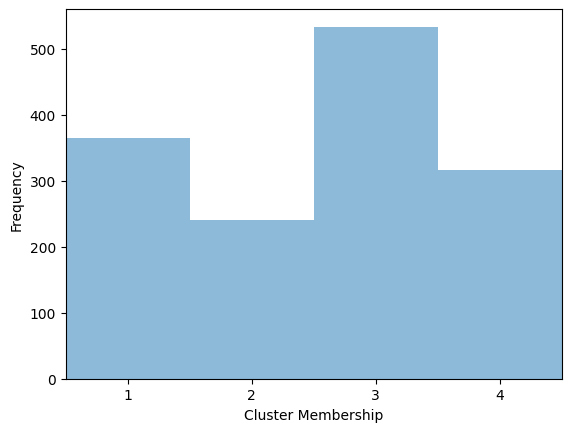

In [69]:
# Histogram of Cluster Memberships
plt.hist(MD_km4, bins=np.arange(-0.5, 4.5, 1), alpha=0.5)
plt.xlabel("Cluster Membership")
plt.ylabel("Frequency")
plt.xticks(range(4), range(1, 5))
plt.xlim(-0.5, 3.5)
plt.show()

In [70]:
# Data Preprocessing
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)

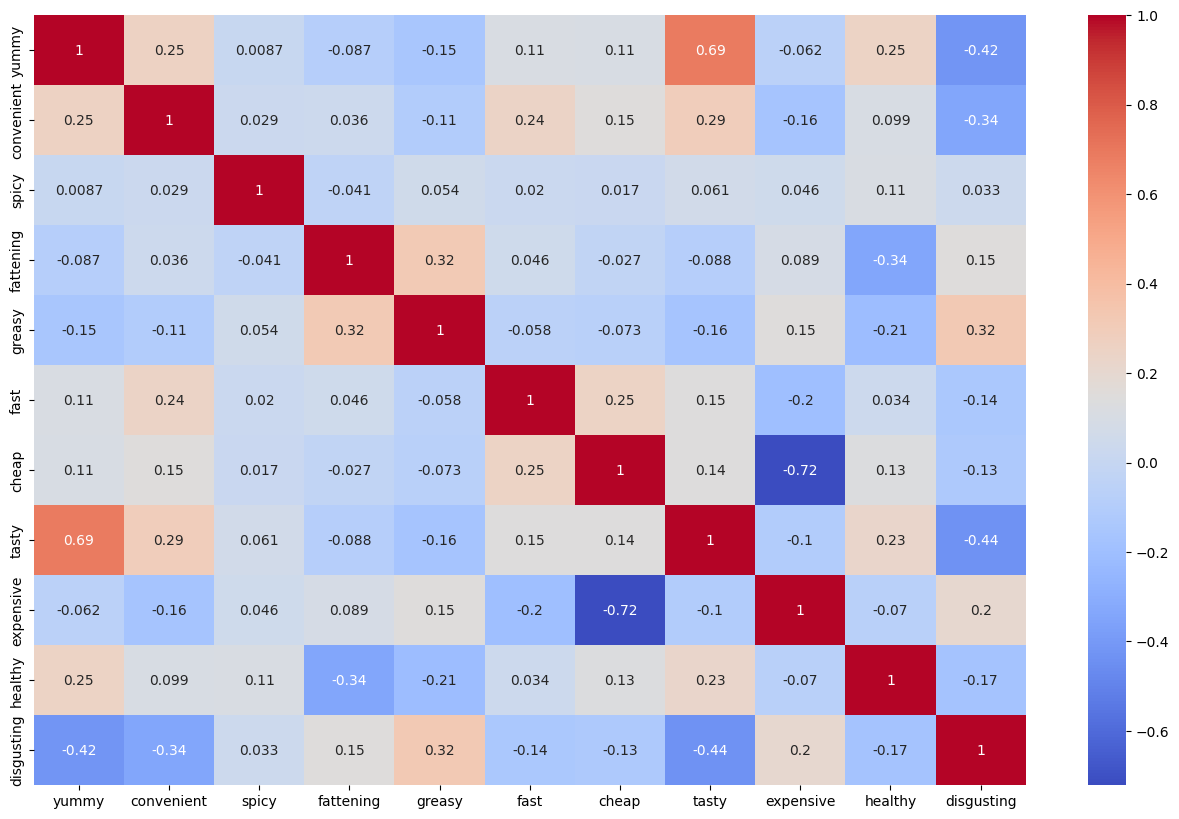

In [71]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = MD_x.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


Accuracy: 0.58
Confusion Matrix:
[[114  46]
 [ 75  56]]


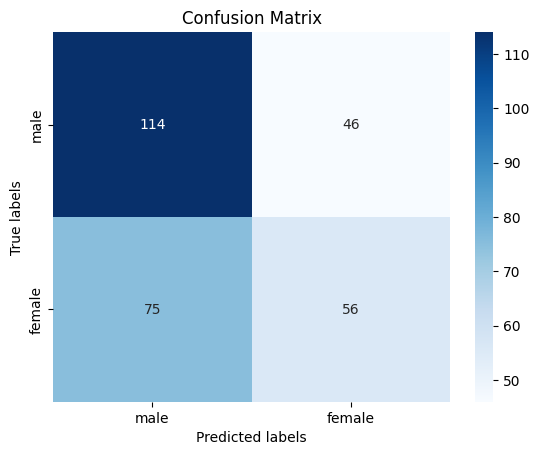

In [72]:

MD_y = mcdonalds['Gender']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(MD_x, MD_y, test_size=0.2, random_state=12)

# Model Training
model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualization of Confusion Matrix
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['male', 'female']); ax.yaxis.set_ticklabels(['male', 'female']);
plt.show()

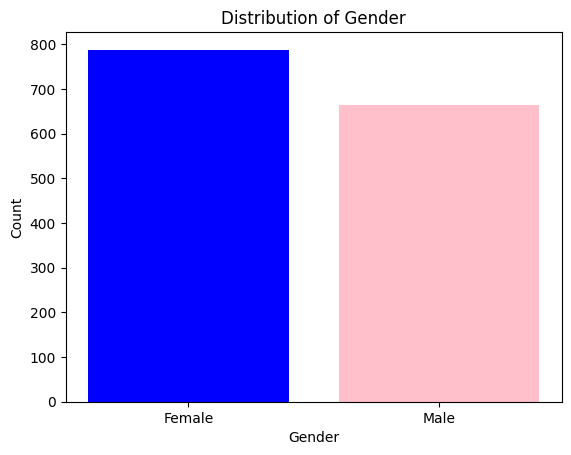

In [73]:
# Gender Distribution
gender_counts = mcdonalds['Gender'].value_counts()

# Plot Gender Distribution
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()